# Proyecto Python para la ciencia de datos. Trabajo módulo1

## Pregunta 1 - Extracción de datos de acciones de Tesla utilizando yfinance 

In [20]:
import yfinance as yf

In [21]:
tesla_data = yf.download('TSLA', start='2023-01-01', end='2025-02-23')

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True


In [22]:
tesla_data_reset = tesla_data.reset_index()

In [23]:
tesla_data_reset.to_csv('tesla_data.csv', index=False)

In [27]:
print(tesla_data_reset.head())

Price        Date       Close        High         Low        Open     Volume
Ticker                   TSLA        TSLA        TSLA        TSLA       TSLA
0      2023-01-03  108.099998  118.800003  104.639999  118.470001  231402800
1      2023-01-04  113.639999  114.589996  107.519997  109.110001  180389000
2      2023-01-05  110.339996  111.750000  107.160004  110.510002  157986300
3      2023-01-06  113.059998  114.389999  101.809998  103.000000  220911100
4      2023-01-09  119.769997  123.519997  117.110001  118.959999  190284000


## Pregunta 2 - Extracción de datos de ingresos de Tesla utilizando Webscrap

In [25]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [38]:
import requests
import pandas as pd

api_key = 'TWZAG8D7XE2BWDT6'

# Símbolo de Tesla
symbol = 'TSLA'

url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={api_key}'

# Realizar la solicitud HTTP
response = requests.get(url)
data = response.json()

# Verificar si la respuesta contiene los datos esperados
if 'quarterlyReports' in data:
    # Crear un DataFrame de pandas con los datos de ingresos trimestrales
    df = pd.DataFrame(data['quarterlyReports'])
    #
    # Seleccionar las columnas de fecha de finalización del periodo e ingresos totales
    df = df[['fiscalDateEnding', 'totalRevenue']]
    #
    # Convertir la columna de ingresos totales a numérica
    df['totalRevenue'] = pd.to_numeric(df['totalRevenue'])
    #
    # Ordenar el DataFrame por fecha en orden descendente
    df = df.sort_values(by='fiscalDateEnding', ascending=False)
    # Mostrar las últimas cinco filas
    print(df.head())
else:
    print("No se encontraron datos de ingresos.")

  fiscalDateEnding  totalRevenue
0       2024-12-31   25707000000
1       2024-09-30   25182000000
2       2024-06-30   25500000000
3       2024-03-31   21301000000
4       2023-12-31   25167000000


## Pregunta 3 -  Extracción de datos de acciones de GameStop utilizando yfinance 

In [39]:
gme = yf.Ticker("GME")

In [40]:
# Datos históricos diarios desde el inicio
historical_data = gme.history(period="max")

# Datos históricos de los últimos 5 años
historical_data = gme.history(period="5y")

# Datos históricos de un período específico
historical_data = gme.history(start="2023-01-01", end="2023-12-31")

print(historical_data)

                                Open       High        Low      Close  \
Date                                                                    
2023-01-03 00:00:00-05:00  18.639999  19.260000  17.090000  17.200001   
2023-01-04 00:00:00-05:00  17.250000  17.930000  16.900000  17.320000   
2023-01-05 00:00:00-05:00  17.059999  17.260000  15.890000  16.219999   
2023-01-06 00:00:00-05:00  16.000000  16.570000  15.410000  16.459999   
2023-01-09 00:00:00-05:00  16.650000  17.129999  16.360001  16.379999   
...                              ...        ...        ...        ...   
2023-12-22 00:00:00-05:00  16.780001  17.200001  16.450001  16.969999   
2023-12-26 00:00:00-05:00  16.980000  17.410000  16.820000  17.360001   
2023-12-27 00:00:00-05:00  17.430000  18.370001  17.370001  18.370001   
2023-12-28 00:00:00-05:00  18.049999  18.320000  17.850000  18.070000   
2023-12-29 00:00:00-05:00  18.040001  18.160000  17.459999  17.530001   

                            Volume  Dividends  Sto

### Recomendaciones

In [42]:
print(gme.recommendations)

  period  strongBuy  buy  hold  sell  strongSell
0     0m          0    0     0     1           0


### Balances

In [43]:
print(gme.balance_sheet)
print(gme.quarterly_balance_sheet)

                                                    2024-01-31    2023-01-31  \
Ordinary Shares Number                             305700000.0   304600000.0   
Share Issued                                       305700000.0   304600000.0   
Total Debt                                         602800000.0   616600000.0   
Tangible Book Value                               1338600000.0  1322300000.0   
Invested Capital                                  1367100000.0  1361800000.0   
...                                                        ...           ...   
Allowance For Doubtful Accounts Receivable          -4400000.0    -2200000.0   
Gross Accounts Receivable                           95400000.0   156100000.0   
Cash Cash Equivalents And Short Term Investments  1199300000.0  1390600000.0   
Other Short Term Investments                       277600000.0   251600000.0   
Cash And Cash Equivalents                          921700000.0  1139000000.0   

                                       

## Pregunta 4 -  Extracción de datos de ingresos de GameStop utilizando Webscraping 

In [2]:
pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [2]:
from alpha_vantage.timeseries import TimeSeries  # Importa TimeSeries (o la clase que necesites)
import pandas as pd

API_KEY = "TWZAG8D7XE2BWDT6"  

ts = TimeSeries(key=API_KEY, output_format='pandas') 


data, meta_data = ts.get_daily(symbol="GME", outputsize='full') # outputsize='full' para todos los datos

print(data.head()) # Imprime las primeras filas del DataFrame


data.to_csv("gme_data.csv")


from alpha_vantage.fundamentaldata import FundamentalData
fd = FundamentalData(key=API_KEY)
income_statement = fd.get_income_statement(symbol='GME')

print(income_statement[0]) # Imprime el primer elemento del diccionario (datos anuales)



annual_reports = income_statement[0]['annualReports']
df_income = pd.DataFrame.from_dict(annual_reports, orient='index')
print(df_income)
df_income.to_csv("gme_income.csv")


            1. open  2. high   3. low  4. close   5. volume
date                                                       
2025-02-21    27.25    27.58  26.1553     26.42   6130903.0
2025-02-20    25.80    27.45  25.7600     27.04   7735228.0
2025-02-19    26.80    26.96  25.9200     26.00   4382120.0
2025-02-18    27.03    27.59  26.6608     26.97   5337801.0
2025-02-14    28.90    28.97  26.9000     27.00  12142612.0


AttributeError: 'FundamentalData' object has no attribute 'get_income_statement'

## Pregunta 5 -  Tablero de acciones e ingresos de Tesla 

[*********************100%***********************]  1 of 1 completed


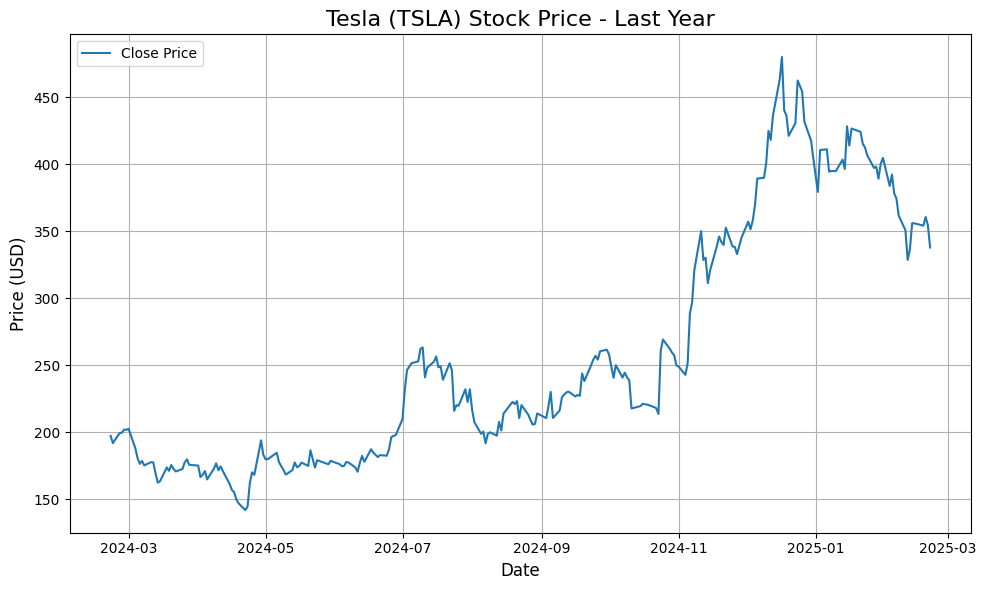

[*********************100%***********************]  1 of 1 completed


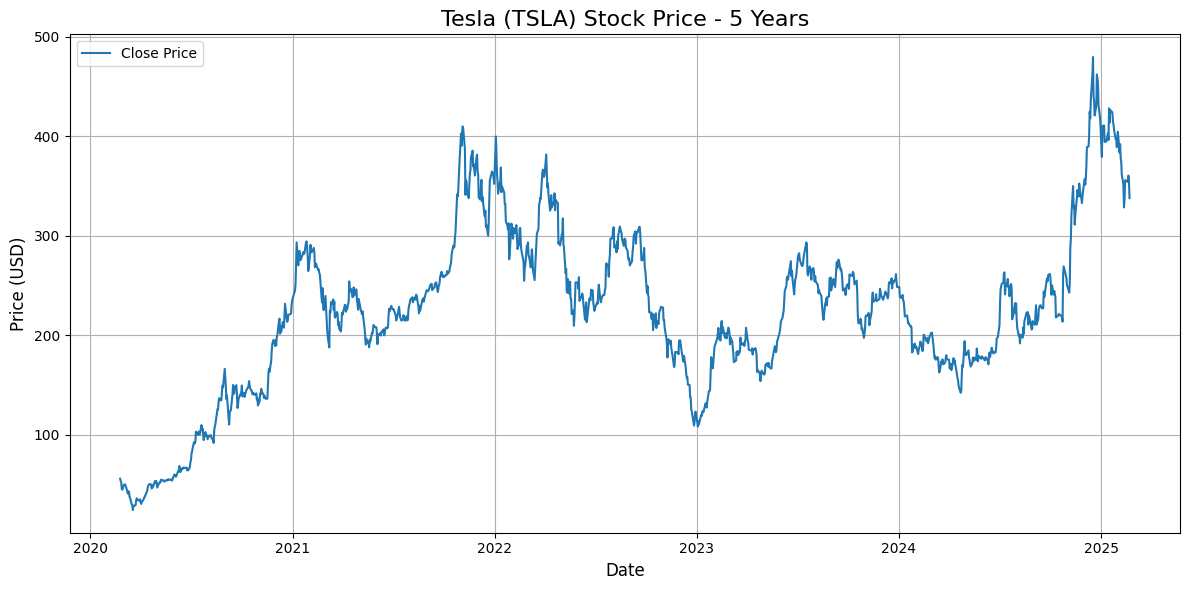

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
def make_graph(ticker, title):
    try:
        data = yf.download(ticker, period="1y")  # Download 1 year of data (adjust as needed)

        if data.empty:
            print(f"No data found for ticker: {ticker}")
            return

        plt.figure(figsize=(10, 6))  
        plt.plot(data['Close'], label='Close Price') 
        plt.title(title, fontsize=16)  
        plt.xlabel('Date', fontsize=12)  
        plt.ylabel('Price (USD)', fontsize=12) 
        plt.legend(loc='upper left') 
        plt.grid(True) 
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

make_graph("TSLA", "Tesla (TSLA) Stock Price - Last Year")

def make_graph_period(ticker, title, period="1y"): # Added period parameter
    try:
        data = yf.download(ticker, period=period)  # Download data for the specified period

        if data.empty:
            print(f"No data found for ticker: {ticker}")
            return

        plt.figure(figsize=(12, 6))
        plt.plot(data['Close'], label='Close Price')
        plt.title(title, fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Price (USD)', fontsize=12)
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

make_graph_period("TSLA", "Tesla (TSLA) Stock Price - 5 Years", period="5y")

## Pregunta 6 -  Cuadro de mando de acciones e ingresos de GameStop 

[*********************100%***********************]  1 of 1 completed


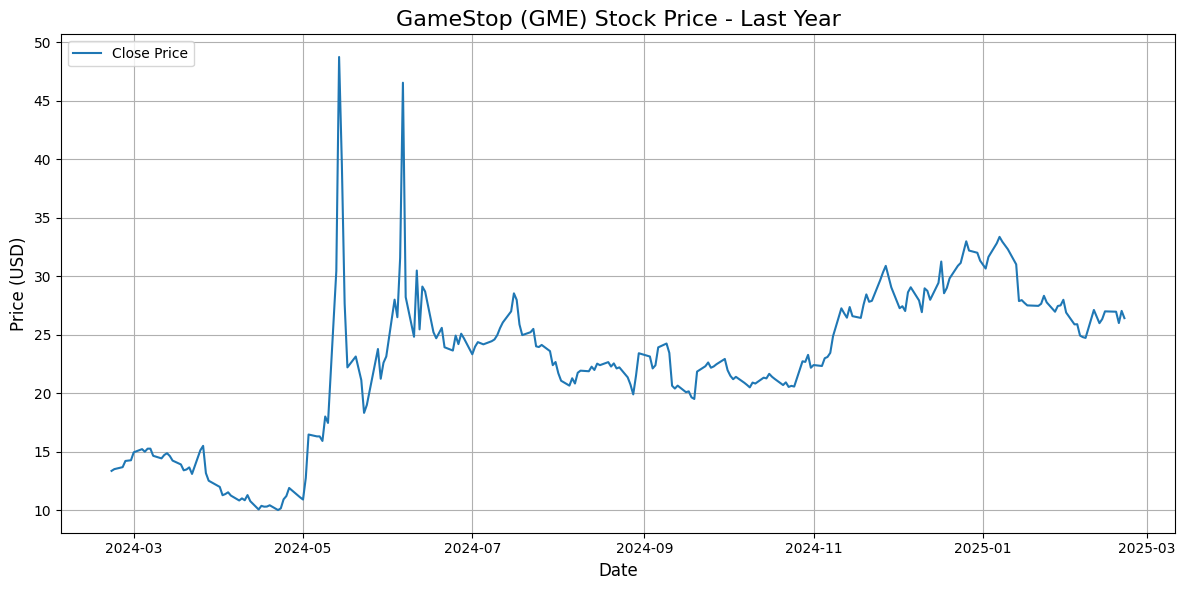

[*********************100%***********************]  1 of 1 completed


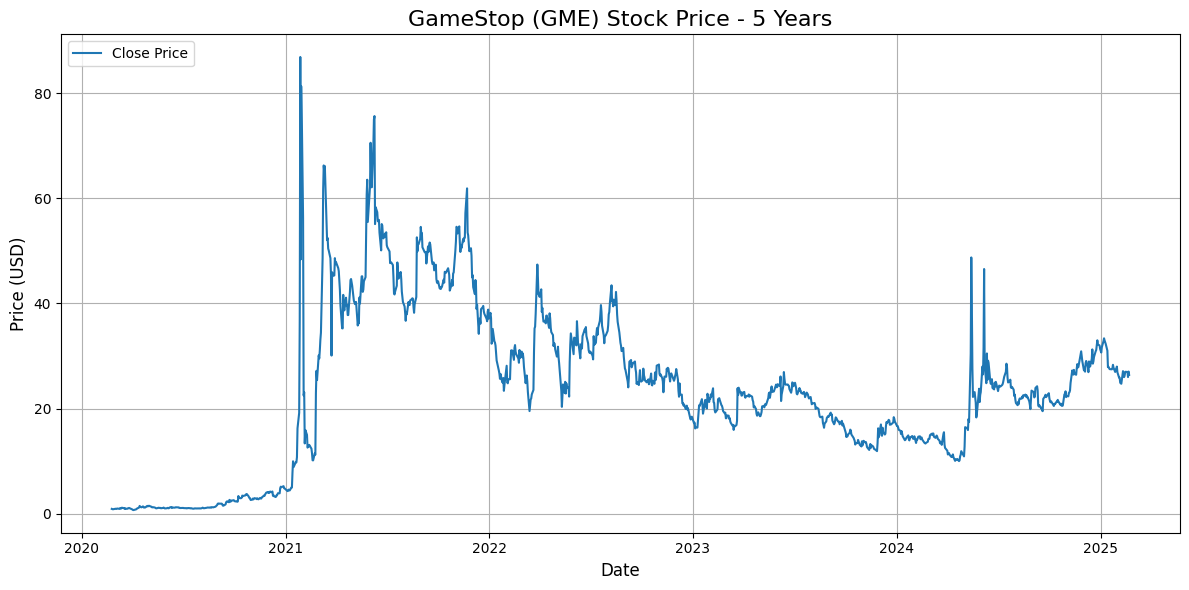

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(ticker, title):

    try:
        data = yf.download(ticker, period="1y")  # Download 1 year of data (adjust as needed)

        if data.empty:
            print(f"No data found for ticker: {ticker}")
            return

        plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
        plt.plot(data['Close'], label='Close Price')  # Plot the closing price
        plt.title(title, fontsize=16)  # Set the title with larger font size
        plt.xlabel('Date', fontsize=12)  # Set x-axis label
        plt.ylabel('Price (USD)', fontsize=12)  # Set y-axis label
        plt.legend(loc='upper left')  # Show the legend
        plt.grid(True)  # Add a grid for better readability
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage for GameStop (GME):
make_graph("GME", "GameStop (GME) Stock Price - Last Year")


# Example with a different time period (e.g., 5 years):
def make_graph_period(ticker, title, period="1y"): # Added period parameter
    try:
        data = yf.download(ticker, period=period)  # Download data for the specified period

        if data.empty:
            print(f"No data found for ticker: {ticker}")
            return

        plt.figure(figsize=(12, 6))
        plt.plot(data['Close'], label='Close Price')
        plt.title(title, fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Price (USD)', fontsize=12)
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

make_graph_period("GME", "GameStop (GME) Stock Price - 5 Years", period="5y")